In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

Read the first file

In [71]:
outcome = pd.read_csv(r"D:\projects\healthcare\archive (1)\set-a\Outcomes.csv")

In [72]:
outcome

,Unnamed: 0.1,Unnamed: 0,RecordID,SAPS-I,SOFA,Length_of_stay,In-hospital_death
0,0,0,132539,6.0,1.0,5.0,0
1,1,1,132540,16.0,8.0,8.0,0
2,2,2,132541,21.0,11.0,19.0,0
3,3,3,132543,7.0,1.0,9.0,0
4,4,4,132545,17.0,2.0,4.0,0
...,...,...,...,...,...,...,...
3995,3995,3995,142665,19.0,7.0,10.0,0
3996,3996,3996,142667,8.0,2.0,3.0,0
3997,3997,3997,142670,8.0,5.0,11.0,0
3998,3998,3998,142671,22.0,10.0,8.0,1


Dealing with Missing Values

In [73]:
print(outcome.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       4000 non-null   int64  
 1   Unnamed: 0         4000 non-null   int64  
 2   RecordID           4000 non-null   int64  
 3   SAPS-I             4000 non-null   float64
 4   SOFA               4000 non-null   float64
 5   Length_of_stay     4000 non-null   float64
 6   In-hospital_death  4000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 218.9 KB
None


In [68]:
outcome.replace(-1, np.nan, inplace=True)

In [69]:
print(outcome.isna().sum())

Unnamed: 0.1         0
Unnamed: 0           0
RecordID             0
SAPS-I               0
SOFA                 0
Length_of_stay       0
In-hospital_death    0
dtype: int64


In [76]:
outcome.drop(columns=[ 'Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [59]:
columns_to_impute = [
    'SAPS-I',
    'SOFA',
    'Length_of_stay' 
]

column_median = outcome[columns_to_impute].median()
outcome[columns_to_impute] = outcome[columns_to_impute].fillna(column_median)

In [60]:
print(outcome.isnull().sum())

Unnamed: 0           0
RecordID             0
SAPS-I               0
SOFA                 0
Length_of_stay       0
In-hospital_death    0
dtype: int64


In [62]:
outcome.to_csv(r"D:\projects\healthcare\archive (1)\set-a\Outcomes.csv")

Create Static File

In [ ]:


path = r"D:\projects\healthcare\archive (1)\set-a\set-a" 
all_files = glob.glob(os.path.join(path, "*.txt"))

static_data = []

for filename in all_files:
    df = pd.read_csv(filename, sep=",")
    
  
    record_id = df.loc[df["Parameter"] == "RecordID", "Value"].values[0]
    
  
    static = df[df["Time"] == "00:00"].copy()
    
 
    static_wide = static.set_index("Parameter")["Value"].to_dict()
    static_wide["RecordID"] = record_id  # نضيف الـ ID
    
    static_data.append(static_wide)


static_df = pd.DataFrame(static_data)


static_df.to_csv(r"D:\projects\healthcare\archive (1)\set-a\static_data.csv", index=False)




Clean static_data.csv  file

In [4]:
static_df = static_df[[ 'RecordID',	'Age',	'Gender',	'Height',	'ICUType',	'Weight'	]]

In [20]:
static_df = pd.read_csv(r"D:\projects\healthcare\archive (1)\set-a\static_data.csv")

In [21]:
static_df

,RecordID,Age,Gender,Height,ICUType,Weight
0,132539.0,54.0,0.0,-1.0,4.0,-1.0
1,132540.0,76.0,1.0,175.3,2.0,76.0
2,132541.0,44.0,0.0,-1.0,3.0,56.7
3,132543.0,68.0,1.0,180.3,3.0,84.6
4,132545.0,88.0,0.0,-1.0,3.0,-1.0
...,...,...,...,...,...,...
3995,142665.0,70.0,0.0,-1.0,4.0,87.0
3996,142667.0,25.0,1.0,-1.0,3.0,166.4
3997,142670.0,44.0,1.0,-1.0,3.0,109.0
3998,142671.0,37.0,1.0,-1.0,3.0,87.4


In [32]:
static_df.replace(-1 , np.nan , inplace=True)

In [33]:
print(static_df.columns.tolist())


['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight']


In [34]:
static_df['Height'].fillna(static_df["Height"].mean(), inplace=True)
static_df["Weight"].fillna(static_df["Weight"].mean(), inplace=True)

C:\Users\Al-Braka\AppData\Local\Temp\ipykernel_9448\3509069478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  static_df['Height'].fillna(static_df["Height"].mean(), inplace=True)
C:\Users\Al-Braka\AppData\Local\Temp\ipykernel_9448\3509069478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [35]:
static_df

,RecordID,Age,Gender,Height,ICUType,Weight
0,132539.0,54.0,0.0,169.787227,4.0,81.478269
1,132540.0,76.0,1.0,175.300000,2.0,76.000000
2,132541.0,44.0,0.0,169.787227,3.0,56.700000
3,132543.0,68.0,1.0,180.300000,3.0,84.600000
4,132545.0,88.0,0.0,169.787227,3.0,81.478269
...,...,...,...,...,...,...
3995,142665.0,70.0,0.0,169.787227,4.0,87.000000
3996,142667.0,25.0,1.0,169.787227,3.0,166.400000
3997,142670.0,44.0,1.0,169.787227,3.0,109.000000
3998,142671.0,37.0,1.0,169.787227,3.0,87.400000


In [36]:
mod = static_df["Gender"].mode()
static_df["Gender"] = static_df["Gender"].fillna(mod[0])

In [37]:
static_df

,RecordID,Age,Gender,Height,ICUType,Weight
0,132539.0,54.0,0.0,169.787227,4.0,81.478269
1,132540.0,76.0,1.0,175.300000,2.0,76.000000
2,132541.0,44.0,0.0,169.787227,3.0,56.700000
3,132543.0,68.0,1.0,180.300000,3.0,84.600000
4,132545.0,88.0,0.0,169.787227,3.0,81.478269
...,...,...,...,...,...,...
3995,142665.0,70.0,0.0,169.787227,4.0,87.000000
3996,142667.0,25.0,1.0,169.787227,3.0,166.400000
3997,142670.0,44.0,1.0,169.787227,3.0,109.000000
3998,142671.0,37.0,1.0,169.787227,3.0,87.400000


In [41]:
static_df.round(0)
static_df["RecordID"] = static_df["RecordID"].astype("Int64")

In [42]:
static_df

,RecordID,Age,Gender,Height,ICUType,Weight
0,132539,54.0,0.0,169.787227,4.0,81.478269
1,132540,76.0,1.0,175.300000,2.0,76.000000
2,132541,44.0,0.0,169.787227,3.0,56.700000
3,132543,68.0,1.0,180.300000,3.0,84.600000
4,132545,88.0,0.0,169.787227,3.0,81.478269
...,...,...,...,...,...,...
3995,142665,70.0,0.0,169.787227,4.0,87.000000
3996,142667,25.0,1.0,169.787227,3.0,166.400000
3997,142670,44.0,1.0,169.787227,3.0,109.000000
3998,142671,37.0,1.0,169.787227,3.0,87.400000


In [ ]:
icu_map = {
    1: "CCU",    # Coronary Care Unit
    2: "CSRU",   # Cardiac Surgery Recovery Unit
    3: "MICU",   # Medical ICU
    4: "SICU"    # Surgical ICU
}


static_df["ICUTypeName"] = static_df["ICUType"].map(icu_map)


In [ ]:
icu_map = {
    0.0 : 'female',
    1.0 : 'male'

}


static_df['Gender'] = static_df["Gender"].map(icu_map)


In [46]:
static_df

,RecordID,Age,Gender,Height,ICUType,Weight,ICUTypeName
0,132539,54.0,female,169.787227,4.0,81.478269,SICU
1,132540,76.0,male,175.300000,2.0,76.000000,CSRU
2,132541,44.0,female,169.787227,3.0,56.700000,MICU
3,132543,68.0,male,180.300000,3.0,84.600000,MICU
4,132545,88.0,female,169.787227,3.0,81.478269,MICU
...,...,...,...,...,...,...,...
3995,142665,70.0,female,169.787227,4.0,87.000000,SICU
3996,142667,25.0,male,169.787227,3.0,166.400000,MICU
3997,142670,44.0,male,169.787227,3.0,109.000000,MICU
3998,142671,37.0,male,169.787227,3.0,87.400000,MICU


In [47]:
static_df.to_csv(r"D:\projects\healthcare\archive (1)\set-a\static_data.csv", index=False)

Merge two files

In [77]:
outcome = pd.read_csv(r"D:\projects\healthcare\archive (1)\set-a\Outcomes.csv")
static_df = pd.read_csv(r"D:\projects\healthcare\archive (1)\set-a\static_data.csv")
Master = pd.merge(static_df, outcome, on="RecordID", how="inner")
Master.to_csv(r"D:\projects\healthcare\archive (1)\set-a\master.csv", index=False)


Delete unimportant columns

In [140]:
master =pd.read_csv(r"D:\projects\healthcare\archive (1)\set-a\master.csv")
master

,RecordID,Age,Gender,Height,ICUType,Weight,ICUTypeName,Unnamed: 0.1,Unnamed: 0,SAPS-I,SOFA,Length_of_stay,In-hospital_death
0,132539,54.0,female,169.787227,4.0,81.478269,SICU,0,0,6.0,1.0,5.0,0
1,132540,76.0,male,175.300000,2.0,76.000000,CSRU,1,1,16.0,8.0,8.0,0
2,132541,44.0,female,169.787227,3.0,56.700000,MICU,2,2,21.0,11.0,19.0,0
3,132543,68.0,male,180.300000,3.0,84.600000,MICU,3,3,7.0,1.0,9.0,0
4,132545,88.0,female,169.787227,3.0,81.478269,MICU,4,4,17.0,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,142665,70.0,female,169.787227,4.0,87.000000,SICU,3995,3995,19.0,7.0,10.0,0
3996,142667,25.0,male,169.787227,3.0,166.400000,MICU,3996,3996,8.0,2.0,3.0,0
3997,142670,44.0,male,169.787227,3.0,109.000000,MICU,3997,3997,8.0,5.0,11.0,0
3998,142671,37.0,male,169.787227,3.0,87.400000,MICU,3998,3998,22.0,10.0,8.0,1


In [141]:
master.drop(columns=[ 'Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

Dealing with inconsistent data

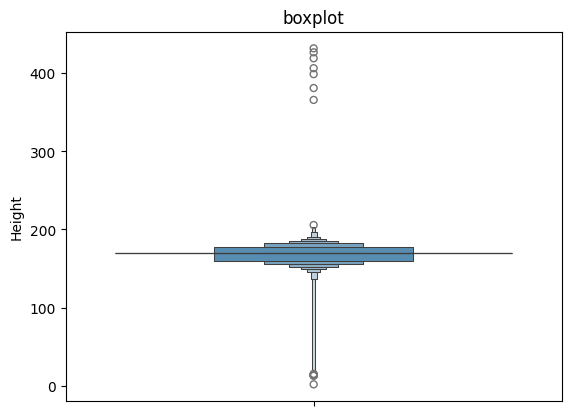

In [142]:
sns.boxenplot(y=master["Height"])
plt.title("boxplot")
plt.show()


In [143]:
upper_bound = 200
lower_bound = 145
master = master[(master["Height"] >= lower_bound) & (master["Height"] <= upper_bound)]

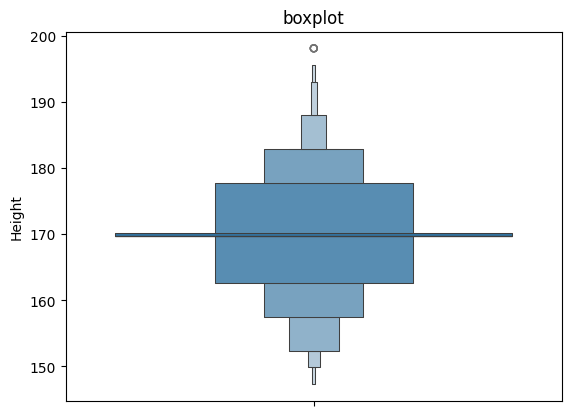

In [144]:
sns.boxenplot(y=master["Height"])
plt.title("boxplot")
plt.show()

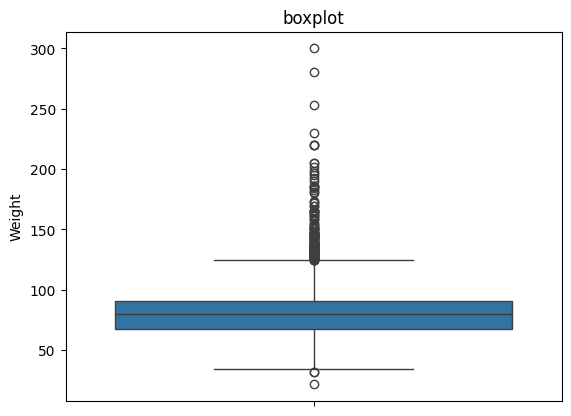

In [145]:
sns.boxplot(y=master['Weight'])
plt.title("boxplot")
plt.show()

In [146]:
upper_bound = 200
lower_bound = 40
master = master[(master["Weight"] >= lower_bound) & (master["Weight"] <= upper_bound)]

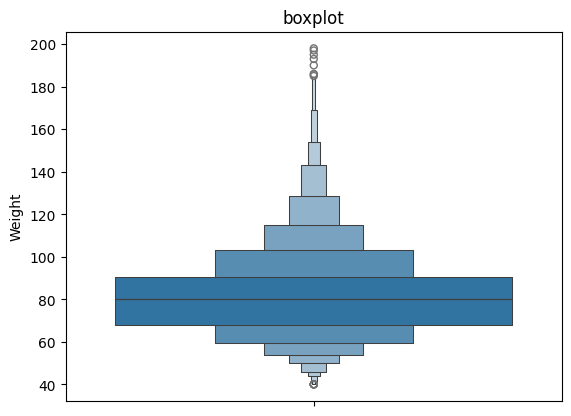

In [147]:
sns.boxenplot(y=master['Weight'])
plt.title("boxplot")
plt.show()

Create Time Series file

In [ ]:

path = r"D:\projects\healthcare\archive (1)\set-a\set-a"
all_files = glob.glob(os.path.join(path, "*.txt"))

time_series_data = []


static_params = ["RecordID", "Age", "Gender", "Height", "ICUType", "Weight"]

for filename in all_files:
    df = pd.read_csv(filename, sep=",")
    

    record_id = df.loc[df["Parameter"] == "RecordID", "Value"].values[0]
    

    time_series = df[~df["Parameter"].isin(static_params)].copy()
    

    time_series["RecordID"] = record_id
    
    time_series_data.append(time_series)


time_series_df = pd.concat(time_series_data, ignore_index=True)


time_series_df.to_csv(r"D:\projects\healthcare\archive (1)\set-a\time_series_data.csv", index=False)



In [ ]:
time_series_df

Parameter,RecordID,Time,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,pH
0,132539.0,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN
1,132539.0,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN
2,132539.0,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN
3,132539.0,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN
4,132539.0,03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295349,142673.0,45:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,112.0,NaN,NaN,NaN,23.0,NaN,NaN
295350,142673.0,45:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.31
295351,142673.0,46:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,121.0,37.3,NaN,NaN,40.0,NaN,NaN
295352,142673.0,47:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,127.0,NaN,NaN,NaN,NaN,NaN,NaN


Dealing with missing value

In [5]:

time_series = pd.read_csv(r"D:\projects\healthcare\archive (1)\set-a\time_series_data.csv")

In [6]:
time_series.columns

Index(['RecordID', 'Time', 'ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Glucose',
       'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'MAP', 'MechVent', 'Mg',
       'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'PaCO2', 'PaO2', 'Platelets',
       'RespRate', 'SaO2', 'SysABP', 'Temp', 'TroponinI', 'TroponinT', 'Urine',
       'WBC', 'pH'],
      dtype='object')

In [ ]:

numeric_cols = time_series.select_dtypes(include='number').columns


for col in numeric_cols:
    time_series[col] = time_series.groupby('RecordID')[col].transform(
        lambda x: x.interpolate(method='linear').bfill()
    )


Dealing with decimal numbers

In [ ]:

int_cols = ['ALP', 'ALT', 'AST','Bilirubin',
       'Cholesterol', 'DiasABP', 'GCS', 'Glucose',
       'HCO3', 'HR', 'MAP', 'MechVent',
       'NIDiasABP', 'NIMAP', 'NISysABP', 'PaCO2', 'PaO2', 'Platelets',
       'RespRate',
       'WBC']


one_decimal_cols = [ 'Albumin', 'BUN', 
        'Creatinine',  'FiO2', 
        'HCT',  'K', 'Lactate',  'Mg',
        'Na', 
        'SaO2','Temp', 'TroponinI', 'TroponinT', 'Urine',
        'pH']


time_series[int_cols] = time_series[int_cols].round(0).astype('Int64')  


time_series[one_decimal_cols] = time_series[one_decimal_cols].round(1)


In [9]:
time_series.to_csv(r"D:\projects\healthcare\archive (1)\set-a\time_series_data.csv", index=False)